# <font color='#eb3483'> Support Vector Machines (SVM) </font>

Support vector machines were all the rage ten years ago and still remain an awesome machine learning algorithm.

SVMs work by trying to find a hyperplane (a fancy high-dimensional verson of a line/plane) in N-dimensional space (where N is the number of features) that separates your data-points into different classes.

In this module we'll walk through how to train a SVM using scikit-learn and visualize it.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### <font color='#eb3483'> Breast Cancer Wisconsin Dataset </font>

In [2]:
# Load the Breast Cancer Wisconsin dataset
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [3]:
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

### <font color='#eb3483'> Training a SVM </font>

SVM models in `scikit-learn` are in the module `sklearn.svm`.   

SVM is another algorithm that can be used both for regression (continuous variables) and classification (categories).  

There is an implementation for regression (`SVR`) and another one for classification (`SVC`).

In [6]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier with a linear kernel
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)
y_pred[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.94
              precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171

[[ 52  11]
 [  0 108]]


Here are some parameters you might find helpful:
- **C** is the Cost parameter (that regulates the slack variables that help regularize the model).
- **kernel** specifies the kernel (rbf, (radial basis function) by default). We can use any kernel we define or any of the available ones (`rbf`, `poly` (polynomial), `linear`or `sigmoid`).
- **class_weight**, allows us to use a dictionary `{clase:peso}` that allows us to assign custom weights to classes. For imbalanced classification problems we can use `class_weight=balanced` that automatically balances the classes based on their support.
- **decision_function_shape** Choose if using One-versus-one (ovo) or One-versus-rest (ovr) for multiclass classification.
- **probability**. If we want to calculate the class probabilities (and use `predict_proba`) (False by default).
- **cache_size** is the size in (megabytes) the model can use to store calculation data in memory. SVMs are computationally intensive, so the bigger the cache the better.

## <font color='#eb3483'>  Kernels </font>

Let's see  the effect of different kernels (i.e. ways to measure distance between points) on the decision hyperplane.

We will use only the first 2 dataset variables to be able to plot them on a scatter plot.

In [8]:
X = breast_cancer.data[:, :2]
y = breast_cancer.target
X.shape

(569, 2)

We are going to use a utility function in, `plot_decision_regions` that plots a diagram indicating the different decision regions for each class. You will need to install Mlxtend (machine learning extensions), a Python library of useful tools for the day-to-day data science tasks. `conda install mlxtend --channel conda-forge`

In [9]:
from mlxtend.plotting import plot_decision_regions

**Linear Kernel**
This kernel is simple and works well when the data is linearly separable.

The linear kernel is defined as:

$$\text{Linear Kernel}: k(x,y) = x^Ty+c$$

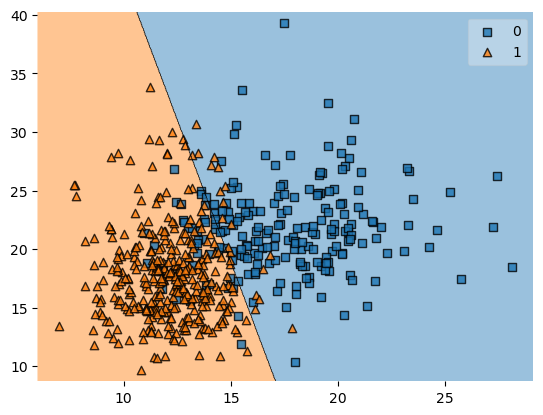

In [10]:
estimator_svm_lineal = SVC(kernel="linear")
estimator_svm_lineal.fit(X, y)

plot_decision_regions(X, y, clf=estimator_svm_lineal);

**Polynomial Kernel**

The polynomial kernel calculates the product of two vectors in a dimensional space of the polynomial combinations of the vectors. So if we have 2 vectors $V_1$ and $V_2$ shaped $[x_1, x_2]$, the polynomial kernel is going to transform them into $[x_1, x_2, x_1^2, x_1x_2, x_2^2...]$ . It has the formula:

$$\text{polynomial kernel}: k(x,y) = (\alpha x^Ty+c)^p$$

The polynomial kernel has a hyperparameter `d` (degree) that indicates the degree of the polynomial expansion (3 by default).

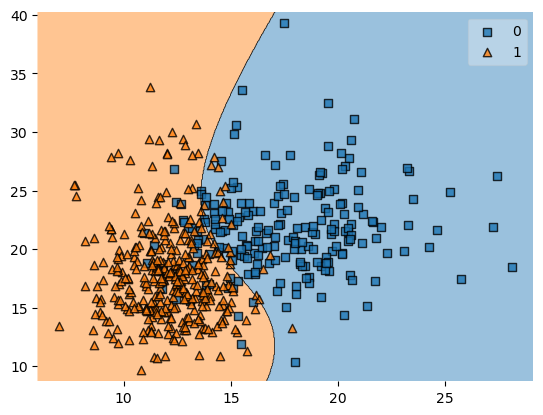

In [11]:
estimator_svm_polinomial = SVC(kernel="poly")
estimator_svm_polinomial.fit(X, y)

plot_decision_regions(X, y, clf=estimator_svm_polinomial);

We see that the decision boundary became a polynomial line (curved line). The more degrees of the expansion the more "curved" the lines can be. If we use a polynomial kernel with `degree=1` we get a linear kernel.

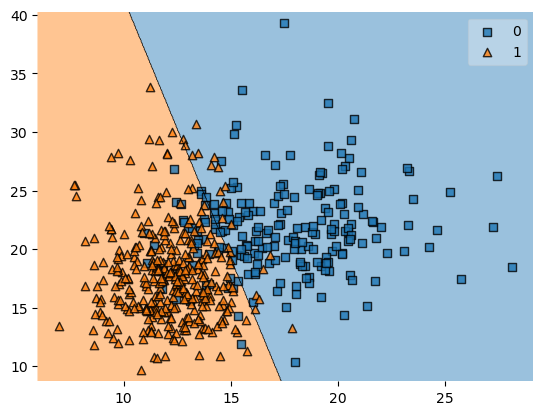

In [12]:
estimator_svm_polinomial_1 = SVC(kernel="poly", degree=1).fit(X, y)
plot_decision_regions(X, y, clf=estimator_svm_polinomial_1);

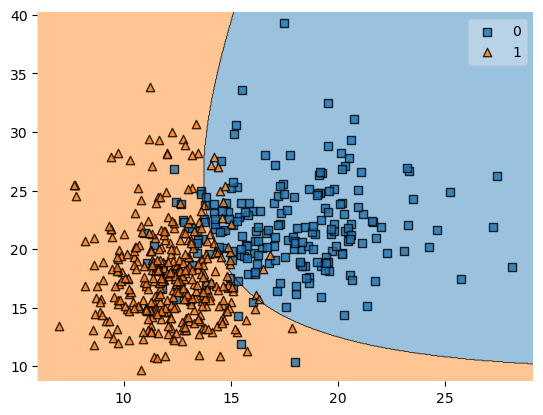

In [13]:
estimator_svm_polinomial_2 = SVC(kernel="poly", degree=2).fit(X, y)
plot_decision_regions(X, y, clf=estimator_svm_polinomial_2);

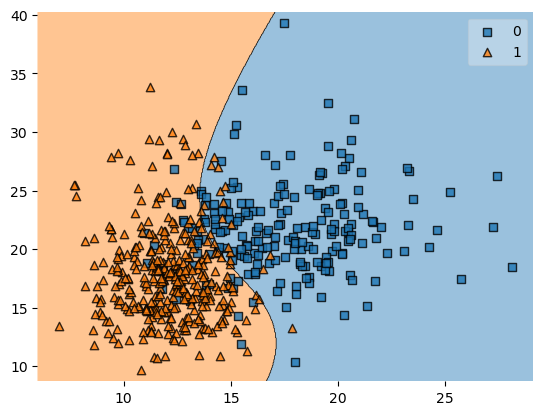

In [14]:
estimator_svm_polinomial_3 = SVC(kernel="poly", degree=3, gamma=0.1).fit(X, y)
plot_decision_regions(X, y, clf=estimator_svm_polinomial_3);

A low `d` reduces the complexity of the polynomial kernel (turning it into a linear kernel).

The **Radial Basis Function**

This kernel can map the data to a higher-dimensional space and is effective for non-linearly separable data.

(RBF) kernel does a radial transformation (that is, transforms the points based to their distance to the origin). It has the formulation:

$$\text{radial kernel}: k(x,y) = \exp(-\gamma ||x - y^2||))$$

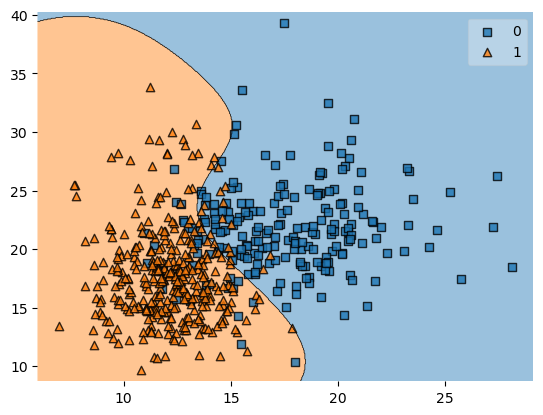

In [15]:
estimator_svm_rbf = SVC(kernel="rbf")
estimator_svm_rbf.fit(X, y)

plot_decision_regions(X, y, clf=estimator_svm_rbf);

We can control the shape of the decision boundary with the hyperparameter `gamma`:

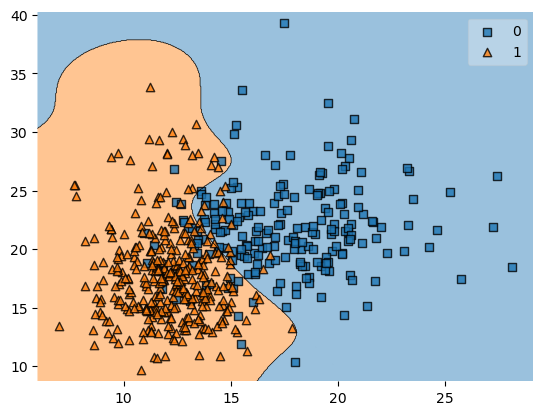

In [16]:
estimator_svm_rbf_a = SVC(kernel="rbf", gamma=0.1).fit(X, y)
plot_decision_regions(X, y, clf=estimator_svm_rbf_a);

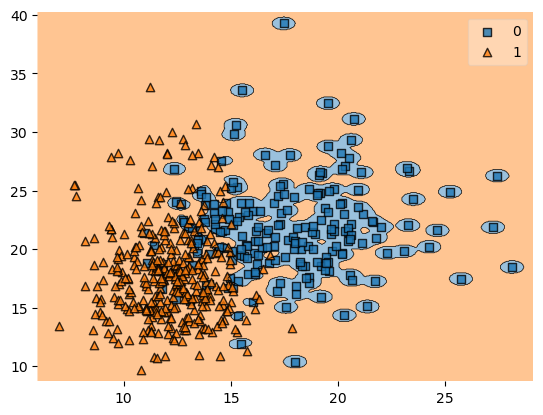

In [17]:
estimator_svm_rbf_b = SVC(kernel="rbf", gamma=7).fit(X, y)
plot_decision_regions(X, y, clf=estimator_svm_rbf_b);

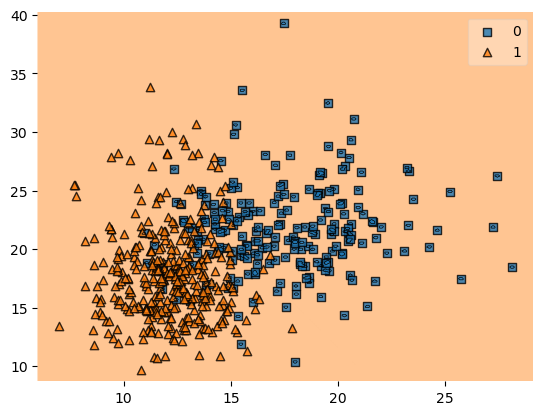

In [18]:
estimator_svm_rbf_c = SVC(kernel="rbf", gamma=100).fit(X, y)
plot_decision_regions(X, y, clf=estimator_svm_rbf_c);

Higher `gamma` values increase rbf's kernel capability to create areas around the data.
We see that for `gamma=100` the model is overfitting (basically creating tiny circles around each observation.

## <font color='#eb3483'>  Evaluate SVM with different kernels </font>

In [19]:
# Load the Breast Cancer Wisconsin dataset
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to train and evaluate SVM with different kernels
def evaluate_svm(kernel_type, **kwargs):
    # Create an SVM classifier with the specified kernel
    svm = SVC(kernel=kernel_type, **kwargs)

    # Train the model
    svm.fit(X_train, y_train)

    # Make predictions
    y_pred = svm.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Kernel: {kernel_type}')
    print(f'Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Evaluate SVM with different kernels
evaluate_svm('linear')
evaluate_svm('poly', degree=3)
evaluate_svm('rbf', gamma=0.1)

Kernel: linear
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[ 59   4]
 [  2 106]]


Kernel: poly
Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.98      0.86      0.92        63
           1       0.92      0.99      0.96       108

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.94       171
weighted avg       0.94      0.94      0.94       171

[[ 54   9]
 [  1 107]]


Kernel: rbf
Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.63      1.00      0.77       108

    accuracy                           0.63    

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
